<a href="https://colab.research.google.com/github/HebahAlshamlan/Hand-Tracking/blob/master/Hand_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

try:
    from google.colab.patches import cv2_imshow
except Exception:
    def cv2_imshow(mat):
        return cv2.imshow('img', mat)

def url_to_image(url):
    from skimage import io
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)
  
  
try:
    from google.colab.patches import cv2_imshow
except Exception:
    def cv2_imshow(mat):
        return cv2.imshow('img', mat)


In [0]:
# set isBGR to true if the you got the image from cv2
Img = type(np.array([])) # image type

def showImg(img, isBGR=False):
    if isBGR:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def url_to_image(url):
        from skimage import io
        return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = 'https://3.top4top.net/p_1448dl4x61.jpg'
imge = url_to_image(url)

**Binarizing**

In [0]:
from imutils.video import VideoStream
import imutils


def tupint(iterable):
    # turns float tuple to int tuple
    return tuple(map(round_int, iterable))

def round_int(x):
    if x == float("-inf"):
        return -sys.maxsize - 1
    elif x == float("inf") or math.isnan(x):
        return sys.maxsize
    return int(round(x))

def blur_averaging(img, kernel=np.ones((5,5),np.float32)/25):
    return cv2.filter2D(img, -1, kernel)


def preproc(img, show=True, equalized=False):
    original = img
    img = blur_averaging(original)
    return img

def binarize(img, show=False):
    otsu_min = 5
    otsu_max = 250
    
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    
    yuv[:,:,0] = 0
    yuv[:,:,1] = 0
    _, yuv[:,:,2] = cv2.threshold(yuv[:,:,2], otsu_min, otsu_max, cv2.THRESH_OTSU)

    dilate_kern = np.ones((5, 5))
    yuv[:,:,2] = cv2.dilate(yuv[:,:,2], dilate_kern)

    bgr = cv2.cvtColor(yuv[:,:,2], cv2.COLOR_GRAY2BGR)
    return bgr


def process(img: Img, *args, **kwargs) -> Img:
  preprocessedImg = preproc(img, *args, **kwargs)
  binarized = binarize(preprocessedImg, *args, **kwargs)
  return binarized



 

# **Tracking Part**

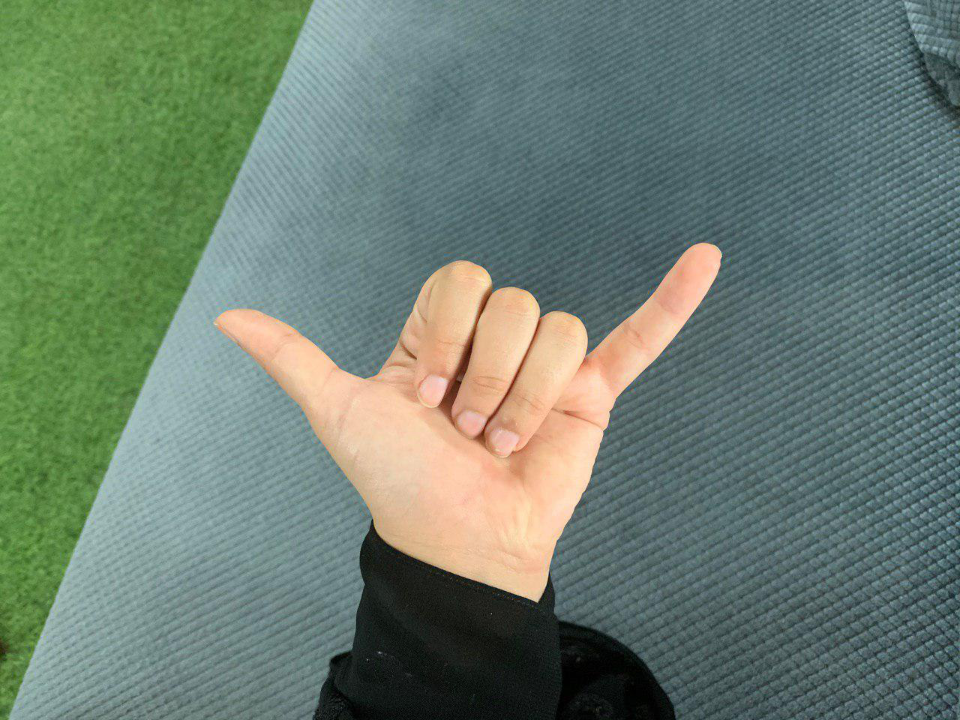

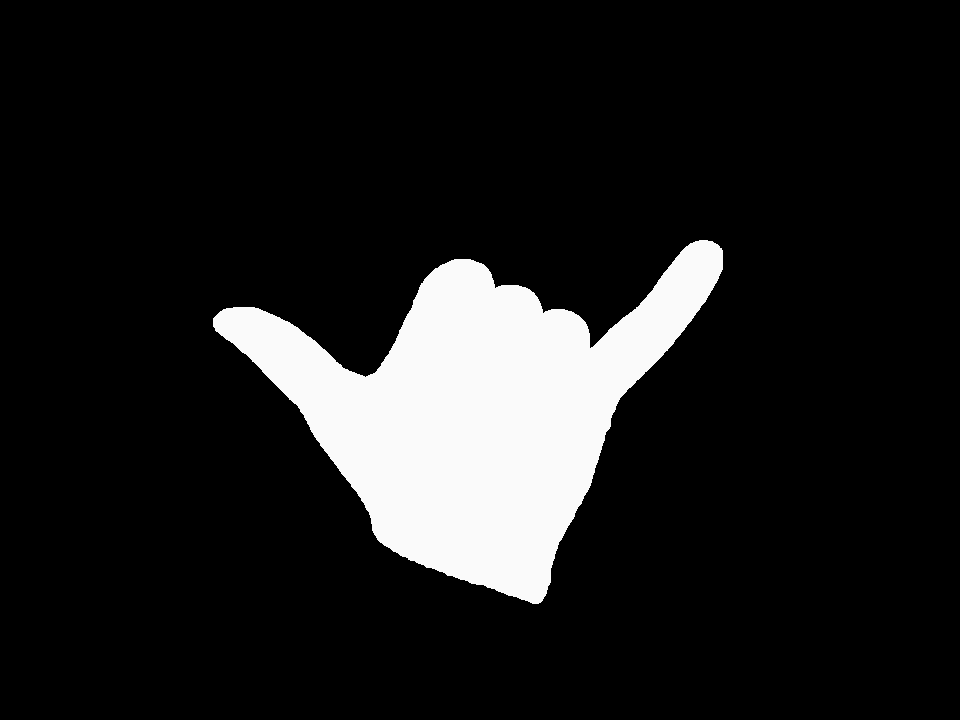

In [4]:
resized = cv2.resize(imge, (960,720)) 
pframe = process(resized)
cv2_imshow(resized)
cv2_imshow(pframe)


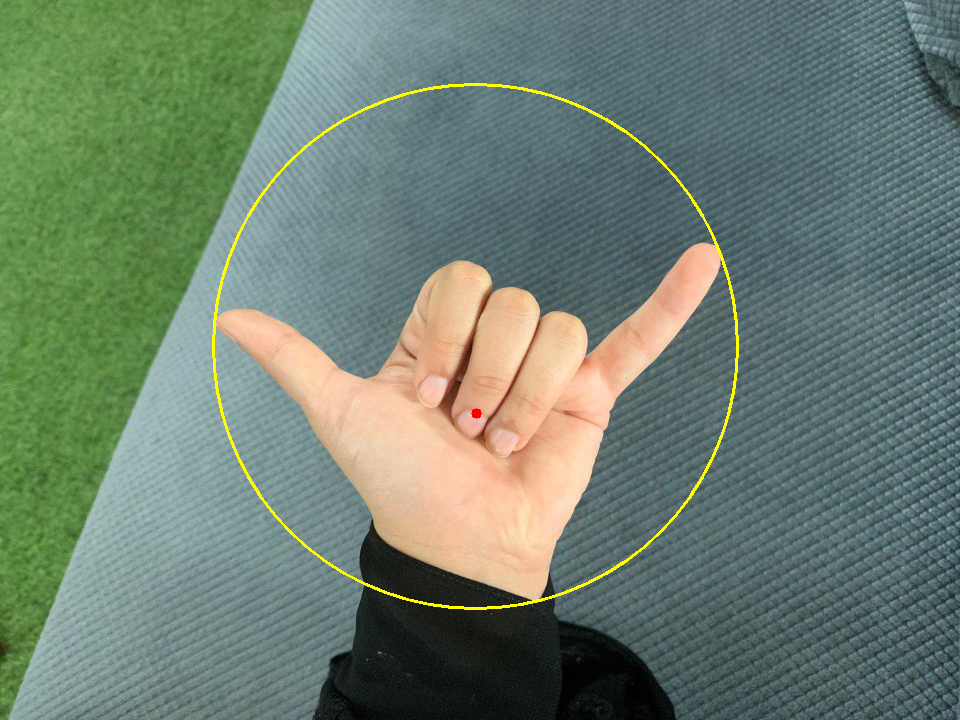

In [5]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt
import base64
try:
    from cv2 import cv2
except:
    import cv2

otsu_min = 5
otsu_max = 250

yuv = cv2.cvtColor(resized, cv2.COLOR_BGR2YUV)

yuv[:,:,0] = 0
yuv[:,:,1] = 0
_, yuv[:,:,2] = cv2.threshold(yuv[:,:,2], otsu_min, otsu_max, cv2.THRESH_OTSU)



cnts = cv2.findContours(yuv[:,:,2], cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
center = None

# only proceed if at least one contour was found
if len(cnts) > 0:
  # find the largest contour in the mask, then use
  # it to compute the minimum enclosing circle and
  # centroid
  c = max(cnts, key=cv2.contourArea)
  ((x, y), radius) = cv2.minEnclosingCircle(c)
  M = cv2.moments(c)
  center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

  # only proceed if the radius meets a minimum size
  if radius > 10:
    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(resized, (int(x), int(y)), int(radius),
      (0, 255, 255), 2)
    cv2.circle(resized, center, 5, (0, 0, 255), -1)


cv2_imshow(resized)
